# HW 4. With breast cancer datasets






In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")

dataset = pd.read_csv('/content/drive/MyDrive/Datasets/data_bcw.csv')
dataset.drop(['Unnamed: 32', 'id'], inplace= True, axis = 1)
label_encoder = LabelEncoder()
dataset.iloc[:,0] = label_encoder.fit_transform(dataset.iloc[:,0]).astype('float64')
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
print(dataset.info())
print('----------------------------------------------')
print(dataset.shape)
print('----------------------------------------------')
print(dataset.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    float64
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

                         diagnosis  ...  fractal_dimension_worst
diagnosis                 1.000000  ...                 0.323872
radius_mean               0.730029  ...                 0.007066
texture_mean              0.415185  ...                 0.119205
perimeter_mean            0.742636  ...                 0.051019
area_mean                 0.708984  ...                 0.003738
smoothness_mean           0.358560  ...                 0.499316
compactness_mean          0.596534  ...                 0.687382
concavity_mean            0.696360  ...                 0.514930
concave points_mean       0.776614  ...                 0.368661
symmetry_mean             0.330499  ...                 0.438413
fractal_dimension_mean   -0.012838  ...                 0.767297
radius_se                 0.567134  ...                 0.049559
texture_se               -0.008303  ...                -0.045655
perimeter_se              0.556141  ...                 0.085433
area_se                  

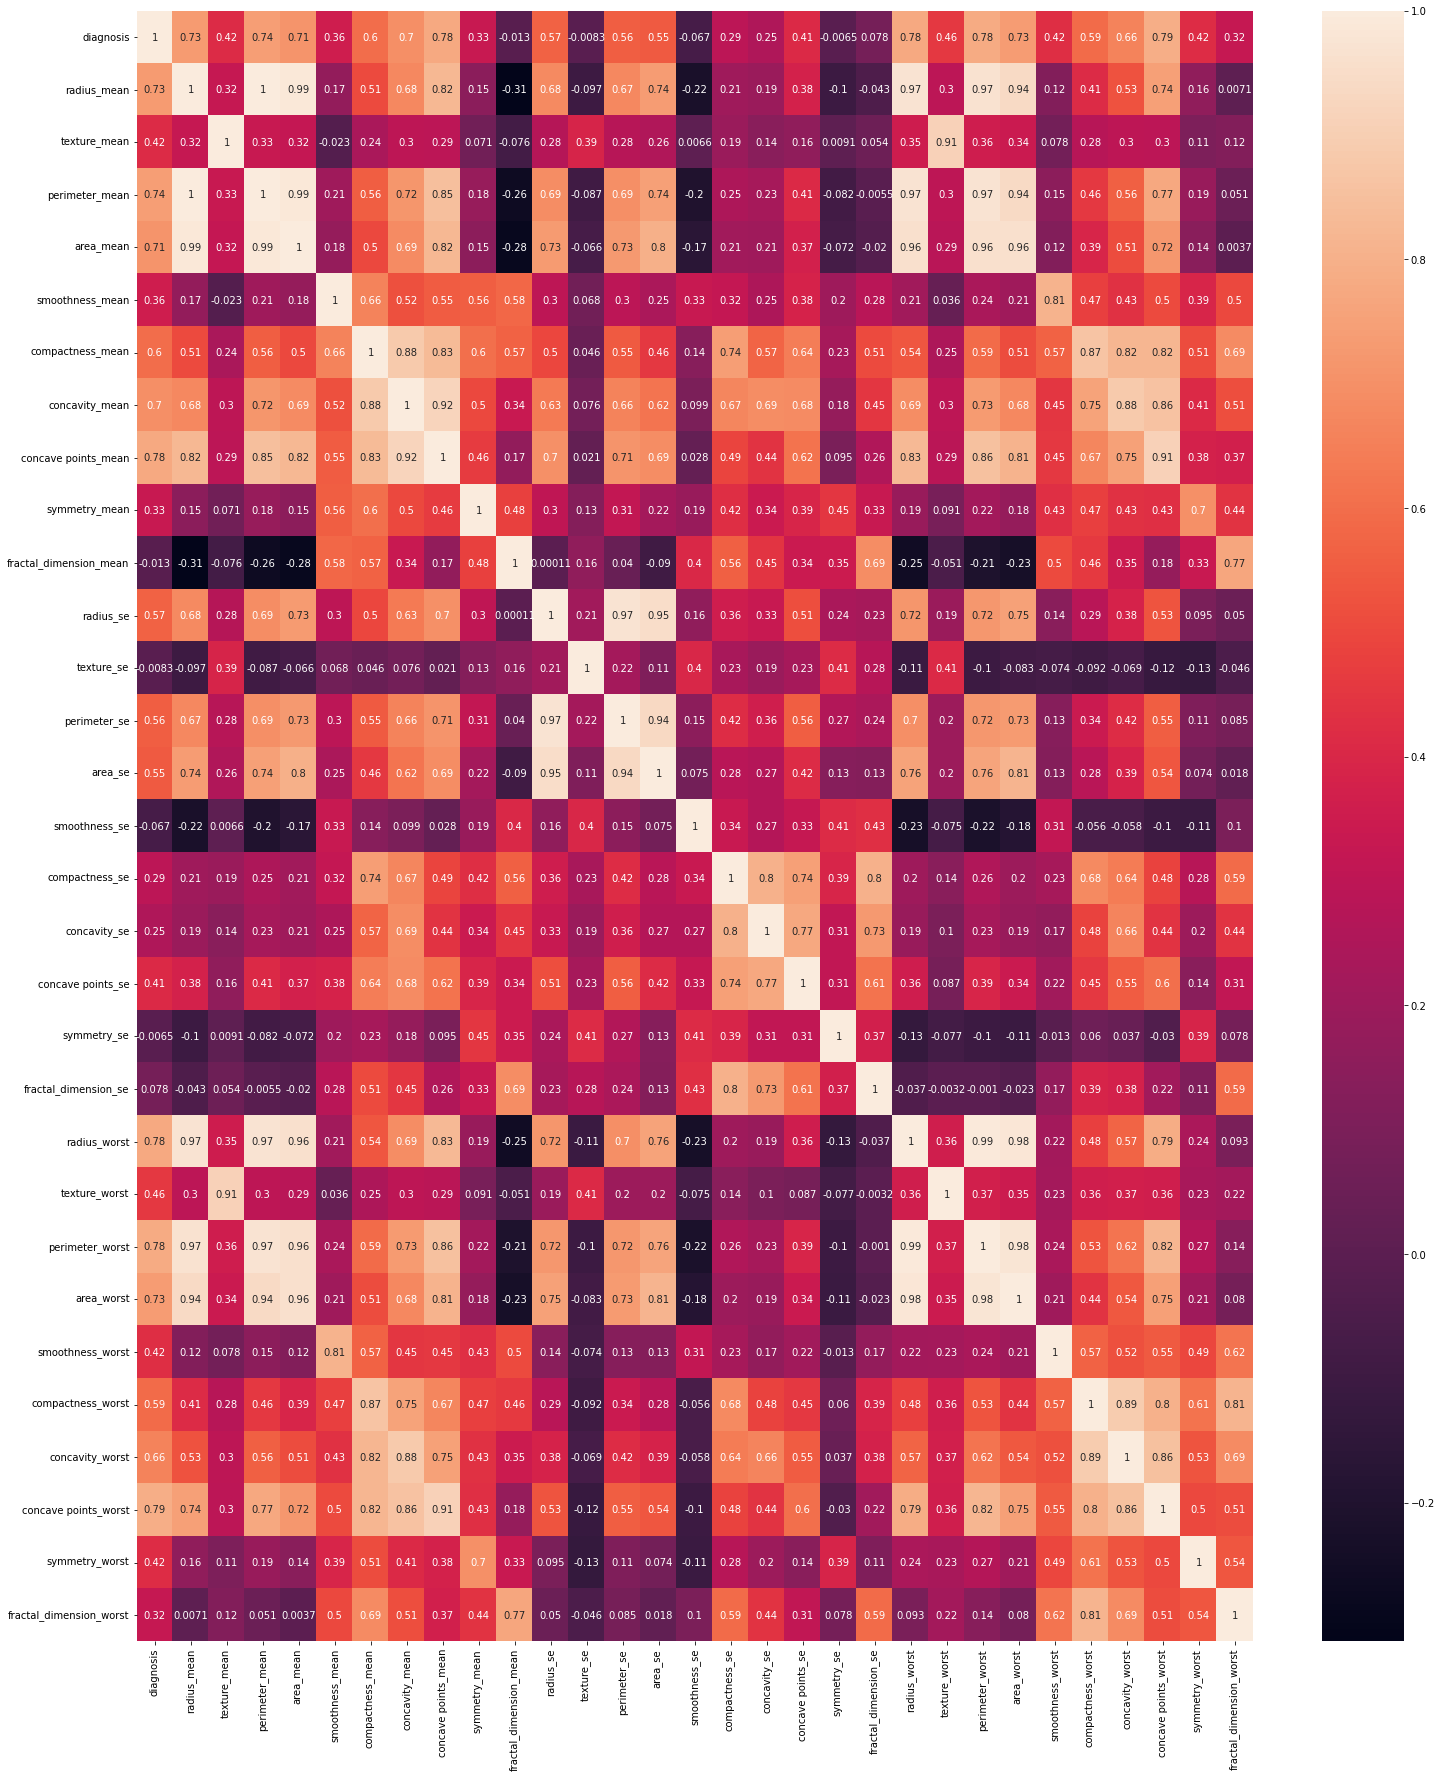

In [4]:
corr_var=dataset.corr()
print(corr_var)
plt.figure(figsize=(25,30))
sns.heatmap(corr_var, annot=True)

In [5]:
from sklearn.model_selection import train_test_split 
target = 'diagnosis'

features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst']


X, y = dataset[features].values, dataset[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [7]:
from sklearn.linear_model import LogisticRegression
classifier7 = LogisticRegression()
classifier7.fit(X_train, y_train)

LogisticRegression()

In [8]:
y_pred7 = classifier7.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
cm7 = confusion_matrix(y_test, y_pred7)
print(cm7)

[[70  1]
 [ 2 41]]


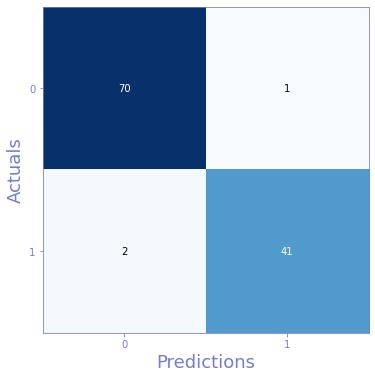

In [19]:
fig, ax = plot_confusion_matrix(conf_mat=cm7, figsize=(6, 6))              # set the color of title
ax.xaxis.label.set_color('#777bd4')
ax.yaxis.label.set_color('#777bd4')
ax.tick_params(colors='#777bd4', which='both')              # myax.spines['bottom'].set_color('yellow')
ax.spines['bottom'].set_color('#777bd4')
ax.spines['top'].set_color('#777bd4') 
ax.spines['right'].set_color('#777bd4')
ax.spines['left'].set_color('#777bd4')


plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)

plt.show()

In [10]:
logreg=accuracy_score(y_test,y_pred7)
logreg

0.9736842105263158

In [11]:
roc_auc_score(y_test, y_pred7)

0.9697019325253848

In [12]:
import sklearn.metrics as metrics
print(metrics.classification_report(y_test, y_pred7))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98        71
         1.0       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [13]:
from sklearn.model_selection import GridSearchCV
parameters_lr = [{'penalty':['l1','l2'],'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}]
grid_search_lr = GridSearchCV(estimator = classifier7,
                           param_grid = parameters_lr,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search_lr.fit(X_train, y_train)
best_accuracy_lr = grid_search_lr.best_score_
best_paramaeter_lr = grid_search_lr.best_params_  
print("Best Accuracy of LR: {:.2f} %".format(best_accuracy_lr.mean()*100))
print("Best Parameter of LR:", best_paramaeter_lr)

Best Accuracy of LR: 97.36 %
Best Parameter of LR: {'C': 0.1, 'penalty': 'l2'}
